In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
locale.setlocale(locale.LC_ALL, '')

%matplotlib inline

In [53]:
data = pd.read_excel("http://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/opecames.xls", sheet_name = "Form de act ext Sector Privado", skiprows= 6)

In [54]:
data = data[:-2].copy()

In [55]:
año = 2002

for i, fila in data.iterrows():
    if fila.PERÍODO.startswith('ACUMULADO'):
        año += 1
    else:
        data.loc[i,'PERÍODO'] = fila.PERÍODO + ' ' + str(año)

In [56]:

data['PERÍODO'] = pd.to_datetime(data.PERÍODO, format='%B %Y', errors="coerce")

In [57]:
data.dropna(axis=0, inplace=True)
data.set_index('PERÍODO', inplace=True)

In [58]:
data['TOTAL'].resample('Y').sum()

PERÍODO
2002-12-31     7393.702456
2003-12-31     3808.167318
2004-12-31     2836.904226
2005-12-31    -1206.279027
2006-12-31     2939.137886
2007-12-31     8871.904385
2008-12-31    23097.858743
2009-12-31    14123.334186
2010-12-31    11409.510071
2011-12-31    21504.001166
2012-12-31     3403.762073
2013-12-31     -396.673680
2014-12-31     3247.868090
2015-12-31     8519.662715
2016-12-31     9951.234947
2017-12-31    22147.541972
2018-12-31    27229.547751
2019-12-31    27018.746669
Freq: A-DEC, Name: TOTAL, dtype: float64

<Figure size 4320x360 with 0 Axes>

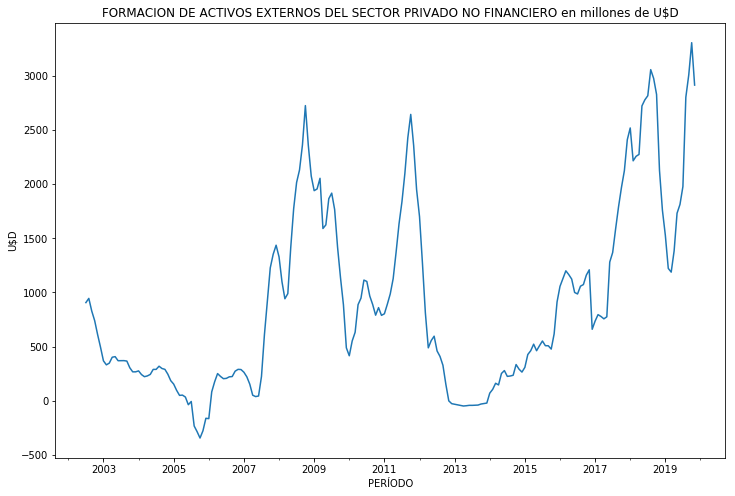

In [59]:
fig = plt.figure(figsize=(60,5))
fig, ax_lst = plt.subplots(1, 1)
plt.title('FORMACION DE ACTIVOS EXTERNOS DEL SECTOR PRIVADO NO FINANCIERO en millones de U$D')
plt.ylabel('U$D')
my_plot = data.TOTAL.rolling(6).mean().plot(legend=False, label = 'FAE', figsize=(12,8))

In [60]:
my_fig = my_plot.get_figure()
my_fig.savefig('gráfico.png', bbox_inches='tight')

In [61]:
x = data.index
y = data.TOTAL.rolling(6).mean()
a = data.TOTAL.max()

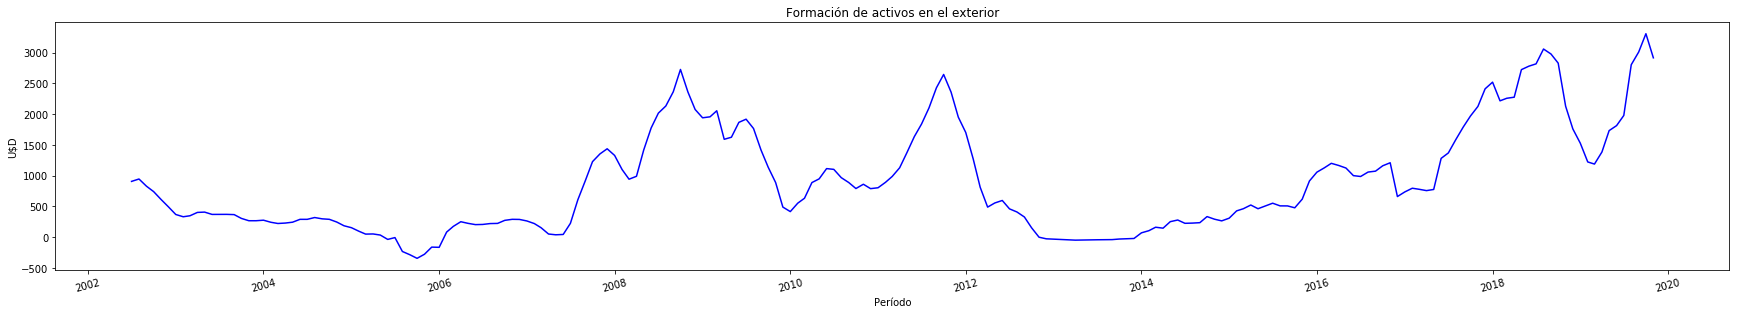

In [62]:
plt.figure(1, figsize = (30,10))

plt.subplot(211)
plt.plot(x,y, color = 'blue')
plt.xticks(rotation=15, color = 'black')
plt.title('Formación de activos en el exterior')
plt.ylabel('U$D')
plt.xlabel('Período')
plt.annotate("",xy=(3,1), xycoords='data')

plt.show()